## Enumeracija grafov (brute-force)

Za majhne $n$ pregledamo vse povezane grafe in identificiramo ekstremne vrednosti $cM_2$ indeksa.

In [ ]:
from sage.all import *
import os

def cM2_index(G):
    return sum(abs(G.degree(u)**2 - G.degree(v)**2) for u, v in G.edges(labels=False))

# Generira graf K_k + K_(n-k)
def generate_join_graph(n, k):
    Polni = graphs.CompleteGraph(k)
    Izolirani = Graph(n - k)
    Polni.relabel({i: i for i in range(k)}, inplace=True)
    Izolirani.relabel({i: i + k for i in range(n - k)}, inplace=True)
    
    G = Graph()
    G.add_vertices(range(n))
    G.add_edges(Polni.edges())

    for u in range(k):
        for v in range(k, n):
            G.add_edge(u, v)
    
    return G

# Preveri ali je G izomorfen K_k + K_(n-k) 
def is_join_graph(G):
    n = G.order()
    for k in range(1, n):
        H = generate_join_graph(n, k)
        if G.is_isomorphic(H):
            return True, k
    return False, None

# Pregled vseh povezanih grafov na n vozliščih, najde min in max cM2 indeksa
def test_all_graphs(n, verbose=True):
    rezultati = []
    
    # Generira vse povezane grafe
    for G in graphs.nauty_geng(f"-c {n}"):
        G = Graph(G)
        obj = cM2_index(G)
        is_join, k_val = is_join_graph(G)
        edges = list(G.edges(labels=False))
        deg = {v: G.degree(v) for v in G.vertices()}
        
        rezultati.append({
            "graph": G,
            "objective": obj,
            "is_join": is_join,
            "k": k_val,
            "edges": edges,
            "deg": deg
        })
    
    # Najdi maksimum in minimum
    max_obj = max(r["objective"] for r in rezultati)
    min_obj = min(r["objective"] for r in rezultati)
    
    max_grafi = [r for r in rezultati if r["objective"] == max_obj]
    min_grafi = [r for r in rezultati if r["objective"] == min_obj]
    
    if verbose:
        print(f"Total graphs: {len(rezultati)}")
        print(f"Min objective: {min_obj}")
        print(f"Max objective: {max_obj}")
    
    return rezultati, max_grafi, min_grafi


def latex_tabela(seznam_n):
    latex_izpis = ""
    latex_izpis += "\\begin{tabular}{|c|c|c|c|c|c|}\n"
    latex_izpis += "\\hline\n"
    latex_izpis += "n & Min $cM_2$ & Je join & $k$ & Max $cM_2$ & $k$ \\\\\n"
    latex_izpis += "\\hline\n"
    
    for n in seznam_n:
        _, max_grafi, min_grafi = test_all_graphs(n, verbose=False)
        
        min_r = min_grafi[0] if min_grafi else None
        max_r = max_grafi[0] if max_grafi else None
        
        min_val = min_r['objective'] if min_r else "-"
        min_join = "Da" if min_r and min_r["is_join"] else "-"
        min_k = min_r['k'] if min_r and min_r['k'] is not None else "-"
        
        max_val = max_r['objective'] if max_r else "-"
        max_k = max_r['k'] if max_r and max_r['k'] is not None else "-"
        
        latex_izpis += f"{n} & {min_val} & {min_join} & {min_k} & {max_val} & {max_k} \\\\\n"
    
    latex_izpis += "\\hline\n"
    latex_izpis += "\\end{tabular}"
    
    return latex_izpis


def draw_graph(res, filename=None, layout='spring'):
    if res is None:
        return
    print(res)

    if 'graph' in res:
        G = res['graph']
    else:
        edges = res['edges']
        G = Graph()
        for (i, j) in edges:
            G.add_edge(i, j)
    
    n = G.num_verts()
    k = G.num_edges() - n + 1
    
    fig = G.plot(
        figsize=6,
        layout=layout,
        vertex_color='black',
        edge_color='black',
        vertex_labels=True,
        title=f"n={n}, k={k}, objective={int(round(res['objective']))}"
    )
    
    if filename:
        directory = os.path.dirname(filename)
        if directory and not os.path.exists(directory):
            os.makedirs(directory)
        
        fig.save(filename)
    
    return fig.show()

\begin{tabular}{|c|c|c|c|c|c|}
\hline
n & Min $cM_2$ & Je join & $k$ & Max $cM_2$ & $k$ \\
\hline
3 & 0 & Da & 2 & 6 & 1 \\
4 & 0 & - & - & 24 & 1 \\
5 & 0 & - & - & 72 & 2 \\
6 & 0 & - & - & 168 & 2 \\
7 & 0 & - & - & 324 & 3 \\
8 & 0 & - & - & 600 & 3 \\
\hline
\end{tabular}

=3
Total graphs: 2
Min objective: 0
Max objective: 6
{'graph': Graph on 3 vertices, 'objective': 6, 'is_join': True, 'k': 1, 'edges': [(0, 2), (1, 2)], 'deg': {0: 1, 1: 1, 2: 2}}


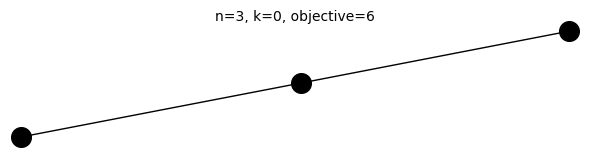

{'graph': Graph on 3 vertices, 'objective': 0, 'is_join': True, 'k': 2, 'edges': [(0, 1), (0, 2), (1, 2)], 'deg': {0: 2, 1: 2, 2: 2}}


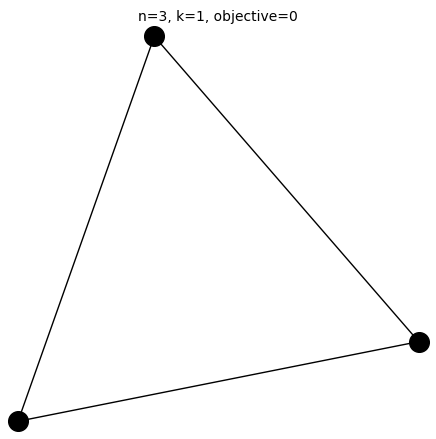


=4
Total graphs: 6
Min objective: 0
Max objective: 24
{'graph': Graph on 4 vertices, 'objective': 24, 'is_join': True, 'k': 1, 'edges': [(0, 3), (1, 3), (2, 3)], 'deg': {0: 1, 1: 1, 2: 1, 3: 3}}


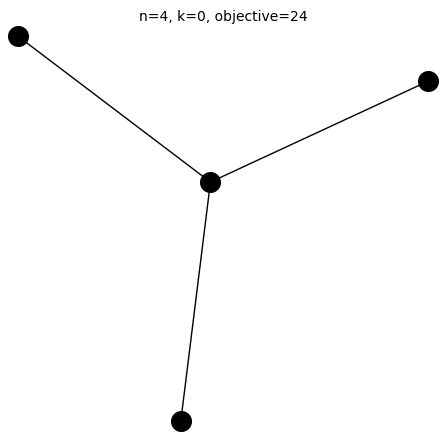

{'graph': Graph on 4 vertices, 'objective': 0, 'is_join': False, 'k': None, 'edges': [(0, 2), (0, 3), (1, 2), (1, 3)], 'deg': {0: 2, 1: 2, 2: 2, 3: 2}}


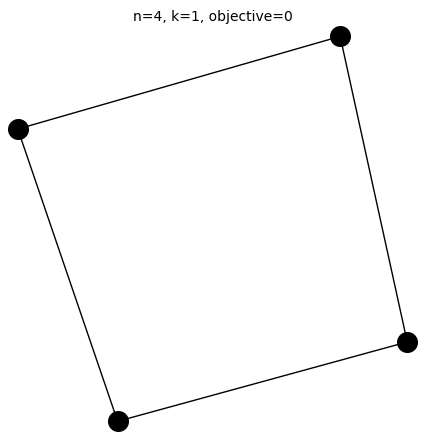


=5
Total graphs: 21
Min objective: 0
Max objective: 72
{'graph': Graph on 5 vertices, 'objective': 72, 'is_join': True, 'k': 2, 'edges': [(0, 3), (0, 4), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)], 'deg': {0: 2, 1: 2, 2: 2, 3: 4, 4: 4}}


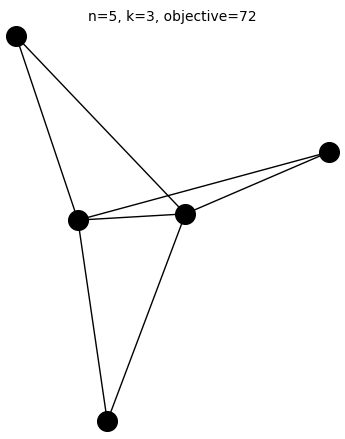

{'graph': Graph on 5 vertices, 'objective': 0, 'is_join': False, 'k': None, 'edges': [(0, 2), (0, 3), (1, 3), (1, 4), (2, 4)], 'deg': {0: 2, 1: 2, 2: 2, 3: 2, 4: 2}}


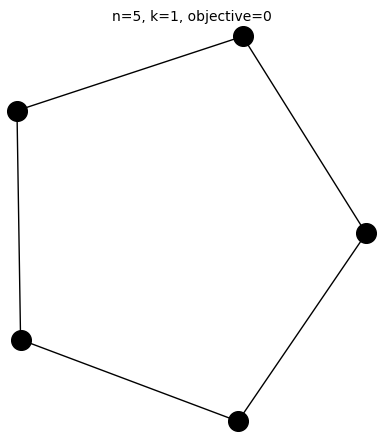


=6


Total graphs: 112
Min objective: 0
Max objective: 168
{'graph': Graph on 6 vertices, 'objective': 168, 'is_join': True, 'k': 2, 'edges': [(0, 4), (0, 5), (1, 4), (1, 5), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)], 'deg': {0: 2, 1: 2, 2: 2, 3: 2, 4: 5, 5: 5}}


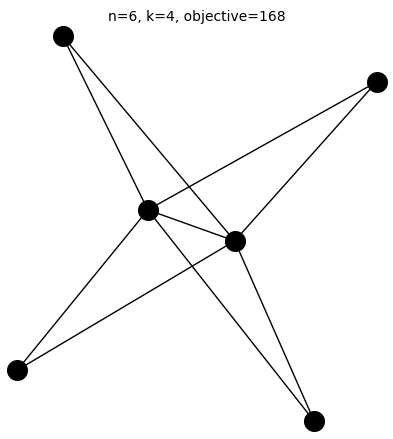

{'graph': Graph on 6 vertices, 'objective': 0, 'is_join': False, 'k': None, 'edges': [(0, 3), (0, 4), (1, 3), (1, 5), (2, 4), (2, 5)], 'deg': {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2}}


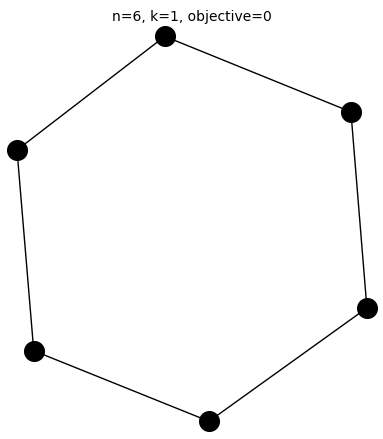


=7


Total graphs: 853
Min objective: 0
Max objective: 324
{'graph': Graph on 7 vertices, 'objective': 324, 'is_join': True, 'k': 3, 'edges': [(0, 4), (0, 5), (0, 6), (1, 4), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)], 'deg': {0: 3, 1: 3, 2: 3, 3: 3, 4: 6, 5: 6, 6: 6}}


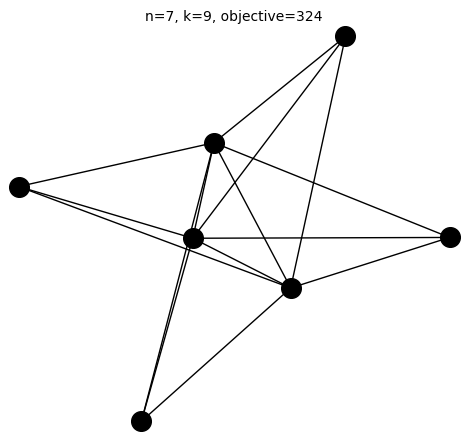

{'graph': Graph on 7 vertices, 'objective': 0, 'is_join': False, 'k': None, 'edges': [(0, 3), (0, 4), (1, 4), (1, 5), (2, 5), (2, 6), (3, 6)], 'deg': {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2}}


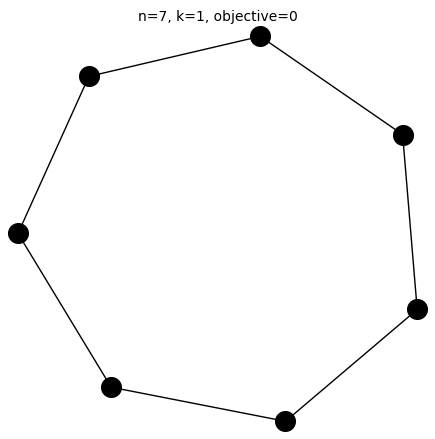


=8


Total graphs: 11117
Min objective: 0
Max objective: 600
{'graph': Graph on 8 vertices, 'objective': 600, 'is_join': True, 'k': 3, 'edges': [(0, 5), (0, 6), (0, 7), (1, 5), (1, 6), (1, 7), (2, 5), (2, 6), (2, 7), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)], 'deg': {0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 7, 6: 7, 7: 7}}


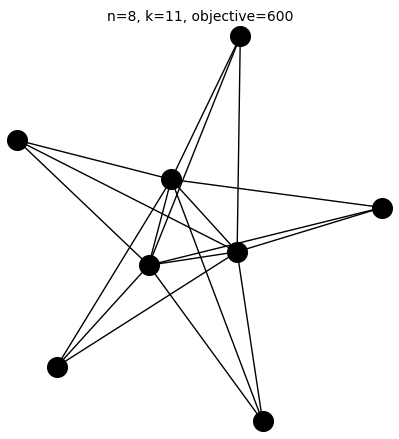

{'graph': Graph on 8 vertices, 'objective': 0, 'is_join': False, 'k': None, 'edges': [(0, 4), (0, 5), (1, 4), (1, 6), (2, 5), (2, 7), (3, 6), (3, 7)], 'deg': {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2}}


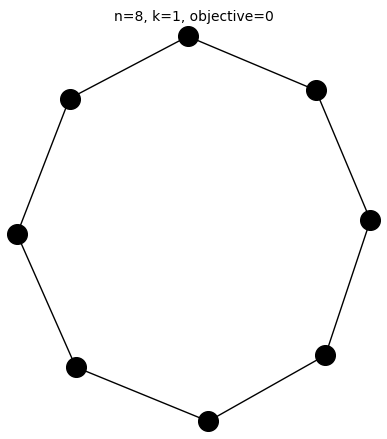

In [ ]:
seznam_n = [3, 4, 5, 6, 7, 8]
print(latex_tabela(seznam_n))

for n in seznam_n:
    print(f"\n={n}")
    _, max_grafi, min_grafi = test_all_graphs(n, verbose=True)
    
    # Maksimum
    if max_grafi:
        draw_graph(
            max_grafi[0], 
            filename=f"images/max_n{n}.png"
        )
    
    # Minimum
    if min_grafi:
        draw_graph(
            min_grafi[0], 
            filename=f"images/min_n{n}.png"
        )
